In [ ]:
!pip install ucimlrepo

# Data Loading and Analysis

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [ ]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [ ]:
print("Duplicates in X:", X.duplicated().sum())
print("Duplicates in y:", y.duplicated().sum())

Duplicates in X: 1179
Duplicates in y: 6490


# Preprocessing

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Concatenated x and y into variable data
data = pd.concat([X, y], axis=1)

print("Before removing duplicates:", data.shape)
#Dropped the duplicates
data = data.drop_duplicates()

print("After removing duplicates:", data.shape)

print("\nCleaned Data:")
print(data.head())

X_clean = data.drop('quality', axis=1)
y_clean = data['quality']

Before removing duplicates: (6497, 12)
After removing duplicates: (5318, 12)

Cleaned Data:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.5

In [ ]:
print(X.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [ ]:
X_clean.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [ ]:
y_clean.head()

,quality
0,5
1,5
2,5
3,6
5,5


In [ ]:
# Grouped the values as low, medium, high
def map_quality(q):
    if q <= 4:
        return 'Low'
    elif q <= 6:
        return 'Medium'
    else:
        return 'High'

y_grouped = y_clean.apply(map_quality)

print(y_grouped.value_counts())

quality
Medium    4074
High      1008
Low        236
Name: count, dtype: int64


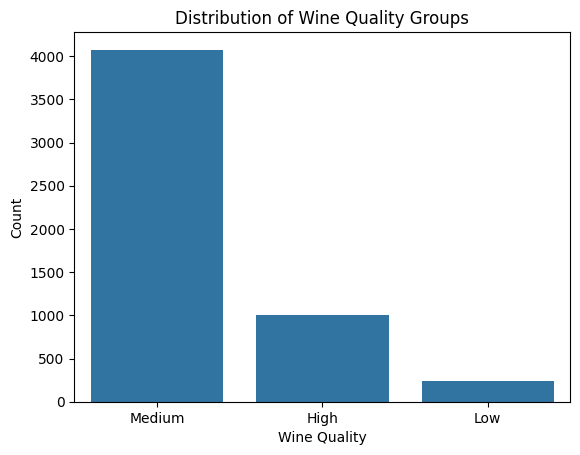

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_grouped)
plt.title("Distribution of Wine Quality Groups")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

# Splitting of data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X_clean, y_grouped, test_size=0.3, random_state=42, stratify=y_grouped)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (3722, 11)
Validation size: (798, 11)
Test size: (798, 11)


# Handling class imbalance

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_clf = SVC(kernel='linear', class_weight='balanced', random_state=42)

svm_clf.fit(X_train_scaled, y_train_enc)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [ ]:
y_val_pred = svm_clf.predict(X_val_scaled)
y_test_pred = svm_clf.predict(X_test_scaled)

print("Validation Accuracy:", accuracy_score(y_val_enc, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test_enc, y_test_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_test_pred))
print("Classification Report:\n", classification_report(y_test_enc, y_test_pred, target_names=le.classes_))

Validation Accuracy: 0.5426065162907269
Test Accuracy: 0.5601503759398496
Confusion Matrix:
 [[124   5  22]
 [  5  23   8]
 [182 129 300]]
Classification Report:
               precision    recall  f1-score   support

        High       0.40      0.82      0.54       151
         Low       0.15      0.64      0.24        36
      Medium       0.91      0.49      0.64       611

    accuracy                           0.56       798
   macro avg       0.48      0.65      0.47       798
weighted avg       0.78      0.56      0.60       798



In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_clf.fit(X_train_scaled, y_train_enc)

SVC(class_weight='balanced', random_state=42)

In [ ]:
y_val_pred = svm_clf.predict(X_val_scaled)
y_test_pred = svm_clf.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Validation Accuracy:", accuracy_score(y_val_enc, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test_enc, y_test_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_test_pred))
print("Classification Report:\n", classification_report(y_test_enc, y_test_pred, target_names=le.classes_))

Validation Accuracy: 0.5977443609022557
Test Accuracy: 0.6228070175438597
Confusion Matrix:
 [[125   7  19]
 [  2  24  10]
 [167  96 348]]
Classification Report:
               precision    recall  f1-score   support

        High       0.43      0.83      0.56       151
         Low       0.19      0.67      0.29        36
      Medium       0.92      0.57      0.70       611

    accuracy                           0.62       798
   macro avg       0.51      0.69      0.52       798
weighted avg       0.80      0.62      0.66       798



# Hyperparamter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#Finding the best parameters using GridSearch
param_grid = {
    'C': [0.1, 1, 10, 50],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

svm1 = SVC(class_weight='balanced', random_state=42)

In [ ]:
grid = GridSearchCV(
    estimator=svm1,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train_enc)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50],
                         'gamma': ['scale', 0.01, 0.1, 1], 'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best Parameters:", grid.best_params_)
best_svm = grid.best_estimator_

Best Parameters: {'C': 50, 'gamma': 1, 'kernel': 'rbf'}


# Model training

In [ ]:
#Training the final model using best parameters
best_svm = SVC(C=50, gamma=1, kernel='rbf', class_weight='balanced', random_state=42)
best_svm.fit(X_train_scaled, y_train_enc)

SVC(C=50, class_weight='balanced', gamma=1, random_state=42)

In [ ]:
y_val_pred = best_svm.predict(X_val_scaled)
y_test_pred = best_svm.predict(X_test_scaled)

#Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Evaluation of best_svm
print("Validation Accuracy:", accuracy_score(y_val_enc, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test_enc, y_test_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_test_pred))
print("Classification Report:\n", classification_report(y_test_enc, y_test_pred, target_names=le.classes_))

Validation Accuracy: 0.768170426065163
Test Accuracy: 0.7857142857142857
Confusion Matrix:
 [[ 65   0  86]
 [  1   3  32]
 [ 49   3 559]]
Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.43      0.49       151
         Low       0.50      0.08      0.14        36
      Medium       0.83      0.91      0.87       611

    accuracy                           0.79       798
   macro avg       0.63      0.48      0.50       798
weighted avg       0.76      0.79      0.76       798



In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_enc)

In [ ]:
from sklearn.svm import SVC
svm_smote = SVC(C=50, gamma=1, kernel='rbf', class_weight='balanced', random_state=42)
svm_smote.fit(X_train_resampled, y_train_resampled)

SVC(C=50, class_weight='balanced', gamma=1, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = svm_smote.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_enc, y_pred))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred))

Test Accuracy: 0.7706766917293233

Confusion Matrix:
 [[ 70   0  81]
 [  1   5  30]
 [ 58  13 540]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.46      0.50       151
           1       0.28      0.14      0.19        36
           2       0.83      0.88      0.86       611

    accuracy                           0.77       798
   macro avg       0.55      0.50      0.51       798
weighted avg       0.75      0.77      0.76       798



# Interpretation

In [ ]:
print("Number of support vectors per class:", best_svm.n_support_)
print("Total support vectors:", best_svm.support_vectors_.shape[0])

Number of support vectors per class: [ 662  164 2218]
Total support vectors: 3044


In [ ]:
print("First 5 support vectors:\n", best_svm.support_vectors_[2000:2005])
print("Labels of first 5 support vectors:\n", y_train_enc[best_svm.support_[2000:2005]])

First 5 support vectors:
 [[-0.62850707 -1.10222963  0.35870401 -0.77889847 -0.52231384 -0.17354678
  -0.08969943 -0.3709793   0.97036244 -0.23078947 -0.62148204]
 [ 4.15061276  1.50995714  1.17799095 -0.49211836  0.45984395 -1.40029961
  -1.67678588  1.61192792 -0.51422378  0.2318193   0.73275051]
 [-1.00780229 -0.15234353  0.08560837 -0.64653842 -0.78077641  0.27254515
   0.4216951  -1.70402617  0.90850468 -0.7594852   1.83306446]
 [-0.78022516 -0.68665446 -0.59713075 -0.84507849 -1.01339273 -0.67540021
   0.24535216 -0.92752637 -1.07094362 -1.68470274  0.05563423]
 [-0.93194325 -0.92412599  2.680017   -0.77889847  2.45000577 -1.17725364
  -1.0419513  -0.62092559 -0.6379393  -0.49513734 -0.62148204]]
Labels of first 5 support vectors:
 [2 2 2 2 2]


# Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_svm, X_test_scaled, y_test_enc, n_repeats=10, random_state=42)

import pandas as pd
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                 Feature  Importance
5    free_sulfur_dioxide    0.027694
10               alcohol    0.026817
9              sulphates    0.018296
7                density    0.016917
1       volatile_acidity    0.015664
8                     pH    0.015288
0          fixed_acidity    0.013158
4              chlorides    0.011779
6   total_sulfur_dioxide    0.009273
3         residual_sugar    0.007769
2            citric_acid    0.006266


# Visualization

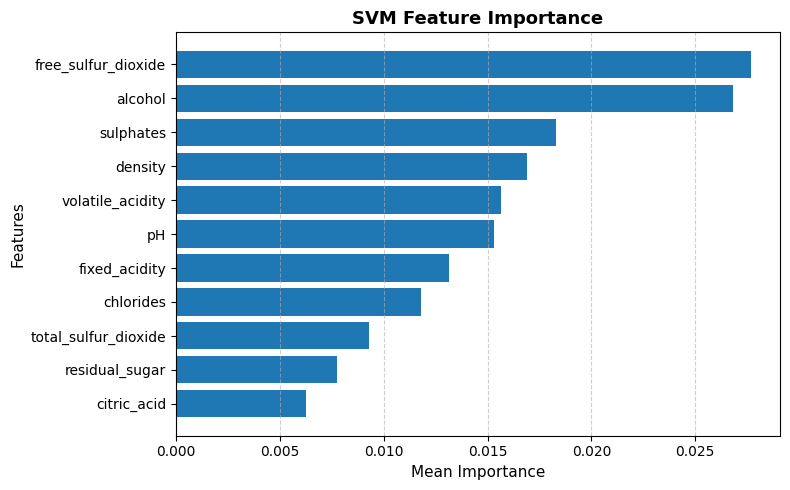

In [ ]:
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Mean Importance', fontsize=11)
plt.ylabel('Features', fontsize=11)
plt.title('SVM Feature Importance', fontsize=13, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()